In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
%matplotlib notebook
from scipy.stats import chi2, norm
import matplotlib as mpl
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)

from classy import Class

from scipy import interpolate


In [18]:
def Pk(cosmo, k, z):
    pk = np.zeros(k.size)
    for kk in range(k.size):
        pk[kk] = cosmo.pk(k[kk]*cosmo.h(), z)*cosmo.h()**3
    return pk 

def derivative(f, k, z, h=0.01):
    return (f(cosmo, k + h, z) - f(cosmo, k - h, z))/(2*h)

def dlnPdlnk(cosmo, k, z):
    return (k/Pk(cosmo, k, z))*derivative(Pk, k, z)

def Rmm(cosmo, k, zz):
    return 1-(1./3.)*dlnPdlnk(cosmo, k, z[zz])+G[zz]

In [7]:
z = np.array([0., 0.5, 1., 2., 3.])
k = np.loadtxt("Resp_G1_fromsims.dat", unpack=True, usecols=(0))
G = np.zeros((z.size, k.size))
for i in range(z.size):
    G[i] = np.loadtxt("Resp_G1_fromsims.dat", unpack=True, usecols=(i+1))

In [5]:
cosmo = Class()
cosmo_dict = {'Omega_b' : 0.05,
           'Omega_cdm' : 0.27,
           'n_s' : 0.96,
           'A_s' : 2.1265e-9 ,
           'h' : 0.67,
           'output':'mPk',
           'P_k_max_h/Mpc' : 20, 
           'z_pk' : '0, 0.5, 1, 2, 3',
            'non linear' : 'halofit'}
cosmo.set(cosmo_dict)
cosmo.compute()

<IPython.core.display.Javascript object>


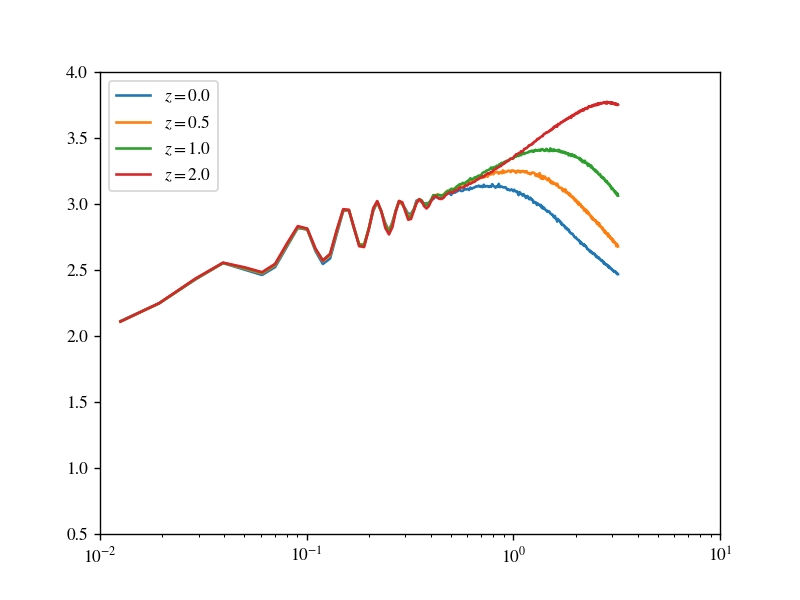

In [25]:
fig, ax = plt.subplots(1,1)
for zz in range(z.size-1):
    ax.semilogx(k, Rmm(cosmo, k, zz), label='$z = '+str(z[zz])+'$')
ax.set_xlim([1e-2, 10])
ax.set_ylim([0.5, 4])
plt.legend()
plt.show()